<a href="https://colab.research.google.com/github/MagnusRedkin/Netology/blob/main/DZ%C2%AB%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B5_%D0%BF%D0%BE%D0%BD%D1%8F%D1%82%D0%B8%D1%8F_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B8%C2%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание
Будем осуществлять работу с непростым набором данных о состоянии здоровья лошадей, испытывающих кишечные колики. Цель – максимально корректно заполнить пропуски.
### Задание 1. Загрузка данных
Изучить представленный набор данных на основе описания его столбцов, загрузить его и оставить 8 столбцов для дальнейшего изучения: surgery?, Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
horse_data = pd.read_csv(
    "https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv",
    header = None,
    na_values = '?')

In [ ]:
horse_data.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [ ]:
columns = ['surgery?', 'age', 'rectal temperature', 'pulse', 'respiratory rate',
           'temperature of extremities', 'pain', 'outcome']

In [ ]:
horse_data = horse_data[[0, 1, 3, 4, 5, 6, 10, 22]]
horse_data.columns = columns
horse_data.head()

,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0


### Задание 2. Первичное изучение данных
Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

In [ ]:
horse_data.describe()

,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
count,299.000000,300.000000,240.000000,276.000000,242.000000,244.000000,245.00000,299.000000
mean,1.397993,1.640000,38.167917,71.913043,30.417355,2.348361,2.95102,1.551839
std,0.490305,2.173972,0.732289,28.630557,17.642231,1.045054,1.30794,0.737187
min,1.000000,1.000000,35.400000,30.000000,8.000000,1.000000,1.00000,1.000000
25%,1.000000,1.000000,37.800000,48.000000,18.500000,1.000000,2.00000,1.000000
50%,1.000000,1.000000,38.200000,64.000000,24.500000,3.000000,3.00000,1.000000
75%,2.000000,1.000000,38.500000,88.000000,36.000000,3.000000,4.00000,2.000000
max,2.000000,9.000000,40.800000,184.000000,96.000000,4.000000,5.00000,3.000000


In [ ]:
Q1 = horse_data.quantile(0.25)
Q3 = horse_data.quantile(0.75)

IQR = Q3 - Q1

In [ ]:
out_low = Q1 - 1.5*IQR
out_upp = Q3 + 1.5*IQR

surgery?
No outliers

age
3      9
9      9
13     9
16     9
23     9
39     9
41     9
55     9
74     9
75     9
82     9
103    9
109    9
135    9
191    9
212    9
227    9
229    9
244    9
252    9
255    9
262    9
275    9
287    9
Name: age, dtype: int64


<Axes: >


rectal temperature
20     39.9
44     35.4
54     40.3
75     39.7
80     36.4
91     40.3
99     39.6
118    36.5
141    36.0
238    36.1
251    36.6
259    40.8
281    40.0
298    36.5
Name: rectal temperature, dtype: float64


<Axes: >


pulse
3      164.0
41     150.0
55     160.0
255    184.0
275    150.0
Name: pulse, dtype: float64


<Axes: >


respiratory rate
3      84.0
39     96.0
41     72.0
82     80.0
84     80.0
103    68.0
106    96.0
120    66.0
125    68.0
186    90.0
208    80.0
229    70.0
244    88.0
255    84.0
265    68.0
269    90.0
295    70.0
Name: respiratory rate, dtype: float64


<Axes: >


temperature of extremities
No outliers

pain
No outliers

outcome
No outliers



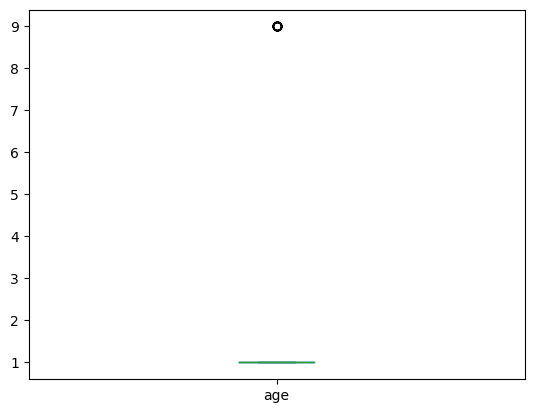

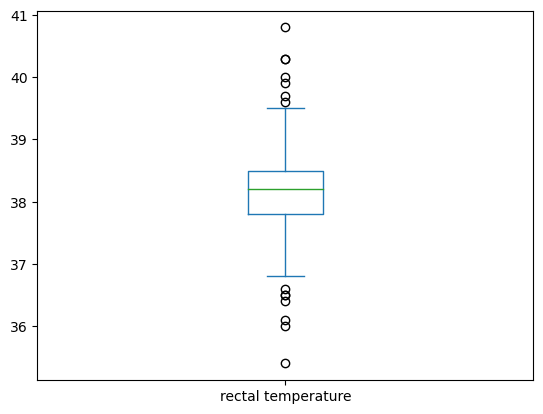

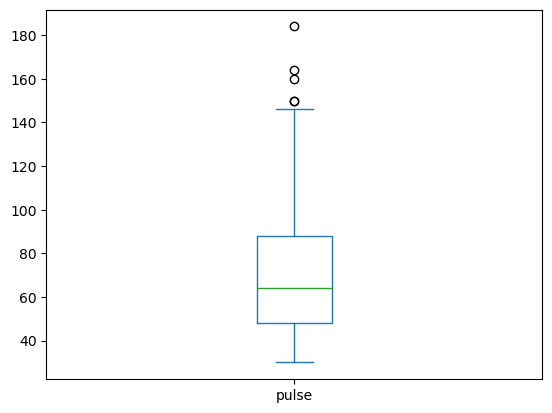

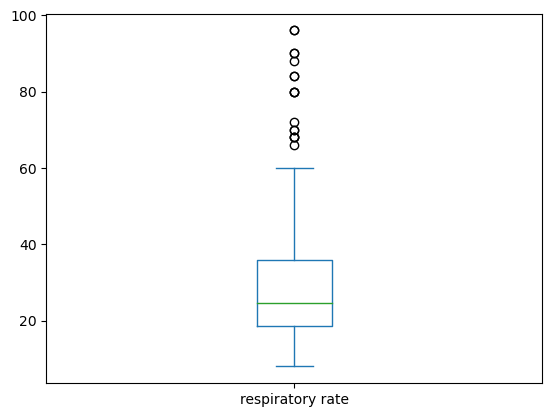

In [ ]:
for col in horse_data:
    val = horse_data[col]
    print(col)
    out = val[(val < out_low[col]) | (val > out_upp[col])]
    if len(out) == 0:
        print('No outliers')
    else:
        print(out)
        display(horse_data[[col]].plot.box())
    print()

### Задание 3. Работа с пропусками
Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

In [ ]:
horse_data.isna().sum(axis=0)

surgery?                       1
age                            0
rectal temperature            60
pulse                         24
respiratory rate              58
temperature of extremities    56
pain                          55
outcome                        1
dtype: int64

In [ ]:
horse_data[horse_data.outcome.isna()]

,surgery?,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
132,NaN,1,38.0,48.0,20.0,3.0,4.0,NaN


Два пустых реквизита в строке, поэтому просто её удалим.

In [ ]:
horse_data.dropna(subset = ['surgery?','outcome'], inplace = True)
horse_data.isna().sum(axis=0)

surgery?                       0
age                            0
rectal temperature            60
pulse                         24
respiratory rate              58
temperature of extremities    56
pain                          55
outcome                        0
dtype: int64

pain категориальная, СКО особого смысла не имеет, поэтому заполним модой.

In [ ]:
horse_data.pain = horse_data.pain.fillna(horse_data.pain.mode().squeeze())
horse_data.isna().sum(axis=0)

surgery?                       0
age                            0
rectal temperature            60
pulse                         24
respiratory rate              58
temperature of extremities    56
pain                           0
outcome                        0
dtype: int64

Для pulse, поскольку там там были выбросы возьмём медиану.

<Axes: ylabel='Frequency'>

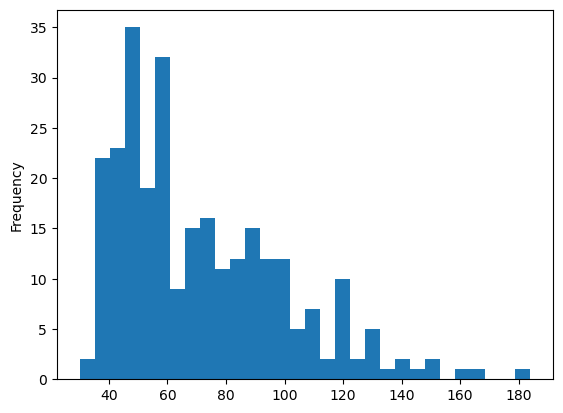

In [ ]:
horse_data.pulse.plot.hist(bins=30)

surgery?                       0
age                            0
rectal temperature            60
pulse                          0
respiratory rate              58
temperature of extremities    56
pain                           0
outcome                        0
dtype: int64

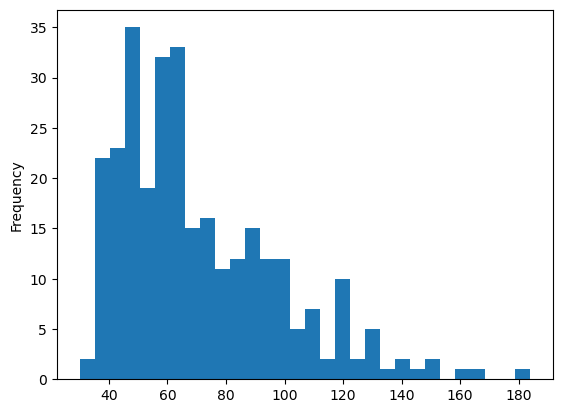

In [ ]:
horse_data.pulse = horse_data.pulse.fillna(horse_data.pulse.median())
horse_data.pulse.plot.hist(bins=30)
horse_data.isna().sum(axis=0)

In [ ]:
horse_data.groupby('surgery?')['respiratory rate', 'pulse', 'temperature of extremities'].median()

/tmp/ipykernel_10411/1190014767.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  horse_data.groupby('surgery?')['respiratory rate', 'pulse', 'temperature of extremities'].median()


,respiratory rate,pulse,temperature of extremities
surgery?,,,
1.0,28.0,66.0,3.0
2.0,24.0,56.0,2.0


In [ ]:
rate_med = horse_data.groupby('surgery?')['respiratory rate'].median()
for s, med in rate_med.items():
    horse_data.loc[(horse_data['surgery?'] == s) &
                   horse_data['respiratory rate'].isna(), 'respiratory rate'] = med

rate_med = horse_data.groupby('surgery?')['rectal temperature'].median()
for s, med in rate_med.items():
    horse_data.loc[(horse_data['surgery?'] == s) &
                   horse_data['rectal temperature'].isna(), 'rectal temperature'] = med

rate_med = horse_data.groupby('surgery?')['temperature of extremities'].median()
for s, med in rate_med.items():
    horse_data.loc[(horse_data['surgery?'] == s) &
                   horse_data['temperature of extremities'].isna(), 'temperature of extremities'] = med

In [ ]:
horse_data.isna().sum(axis=0)

surgery?                      0
age                           0
rectal temperature            0
pulse                         0
respiratory rate              0
temperature of extremities    0
pain                          0
outcome                       0
dtype: int64